In [11]:
import os
import numpy as np
import shutil
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras.utils import load_img
from keras.utils import img_to_array

In [12]:
# define location of dataset
folder = './Raw_images/'

# Making list of images and labels
photos, labels = list(), list()
Dataset=[]
# enumerate files in the directory
for file in os.listdir(folder):

    # determine class
    output = 0
    name = file.split('0')[0]
    name = name.replace('_', ' ')
    name.rstrip()
    # print(name)

    # load image
    photo = load_img(folder + file, target_size=(224, 224))

    # converting image to numpy array
    photo = img_to_array(photo)

    # Stroring images and labels
    # print(photo, name)
    photo = photo.reshape(3,224,224)
    photos.append(photo)
    labels.append(name)
    Dataset.append([photo, name])

# convert to a numpy arrays
photos = np.asarray(photos,dtype='int')
# photos.reshape(photos.shape[0], 3 , 200, 200)
labels = np.asarray(labels, dtype=object)
Dataset = np.asarray(Dataset, dtype=object)

print(photos.shape, labels.shape, Dataset.shape)


(130, 3, 224, 224) (130,) (130, 2)


In [13]:
# One hot encoding of labels
# Converting labels to integers as sklearns one hot encoder cannot work with strings
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# binary encoding the integers as one hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
encoded_labels = onehot_encoder.fit_transform(integer_encoded)
encoded_labels = np.asarray(encoded_labels, dtype='int')
encoded_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [14]:
np.save('Images.npy', photos)
np.save('Labels.npy', encoded_labels)
np.save('Dataset.npy', Dataset)

In [15]:
import matplotlib.pyplot as plt

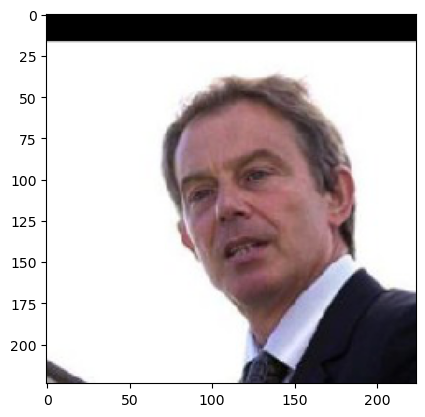

In [18]:
plt.imshow(photos[0].reshape(224,224,3))